In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file_url = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0'
csv_url = file_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [3]:
data = pd.read_csv(csv_url, parse_dates = ['created_at'])

In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [5]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

- The mean is \\$3,145.13, while the standard deviation is really high at \\$41,282.54, so the mean is not really a good representation of the data

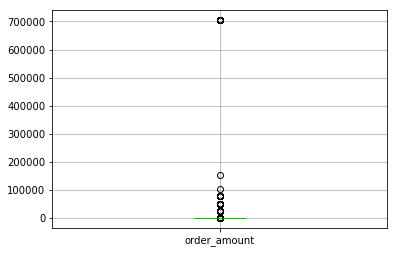

In [6]:
data.boxplot(column='order_amount')

In [7]:
data['order_amount_log'] = np.log10(data['order_amount'])

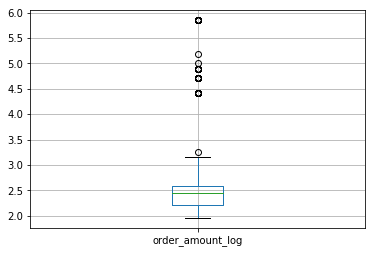

In [8]:
data.boxplot(column='order_amount_log')

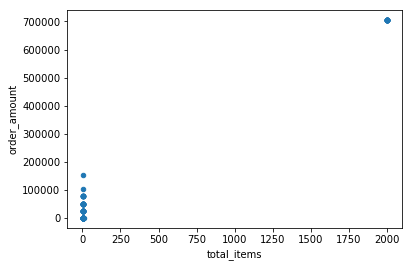

In [9]:
data.plot.scatter(x='total_items', y = 'order_amount')

In [10]:
q1 = data.order_amount.quantile(0.25)
q3 = data.order_amount.quantile(0.75)
IQR =  q3 - q1

In [11]:
data_outliers = data[(data.order_amount > q3 + IQR * 1.5) | (data.order_amount < q1 - IQR * 1.5)]

In [12]:
data_outliers_removed = (
    data.merge(data_outliers, how = 'left', indicator=True)
        .query('_merge == "left_only"')
        .drop(columns='_merge'))

In [13]:
data_outliers_removed.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_log
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2.350248
1,2,92,925,90,1,cash,2017-03-03 17:38:52,1.954243
2,3,44,861,144,1,cash,2017-03-14 04:23:56,2.158362
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2.193125
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,2.193125


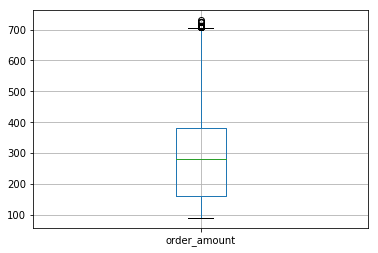

In [14]:
data_outliers_removed.boxplot(column='order_amount')

([<matplotlib.axis.XTick at 0x7f9b6a64cc88>,
 <a list of 5 Text xticklabel objects>)

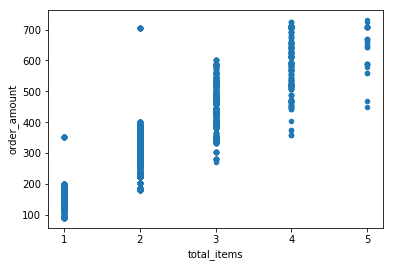

In [15]:
data_outliers_removed.plot.scatter(x='total_items', y = 'order_amount')
plt.xticks(range(1, 6))